In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets_727551_1263738_heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

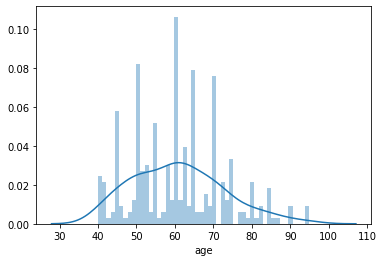

In [4]:
sns.distplot(df['age'], bins = 50)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


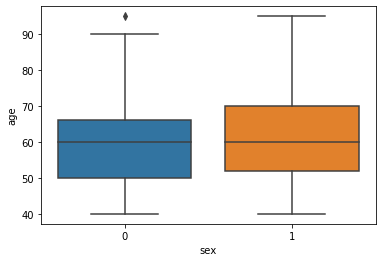

In [6]:
# age ~ sex
sns.boxplot(x = 'sex', y = 'age', data = df)

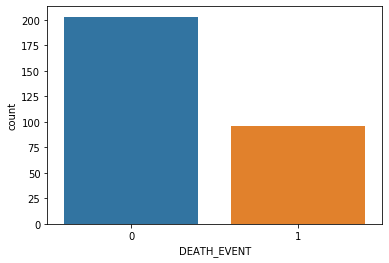

In [7]:
# death event
sns.countplot(df['DEATH_EVENT'])
plt.show()

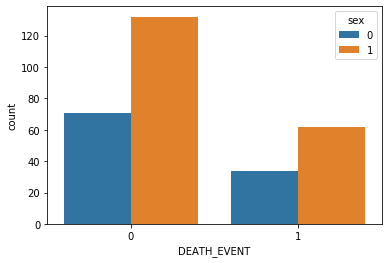

In [8]:
# death event ~ gender
sns.countplot(x ='DEATH_EVENT', hue = 'sex', data = df)
plt.show()

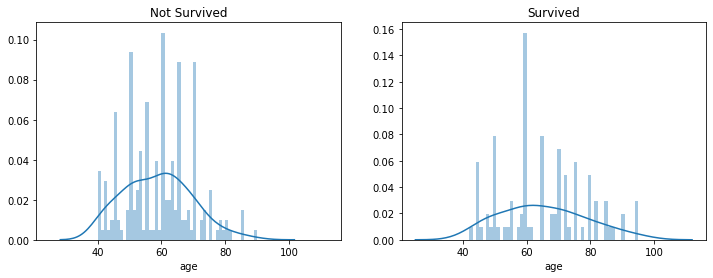

In [9]:
# Gender factor Analysis ~ survived or not

f, axes = plt.subplots(1, 2, figsize = (12, 4), sharex = True)
sns.distplot(df[df['DEATH_EVENT'] == 0]['age'], ax = axes[0], bins = 50)
axes[0].set_title('Not Survived')

sns.distplot(df[df['DEATH_EVENT'] == 1]['age'], ax = axes[1], bins = 50)
axes[1].set_title('Survived')
plt.show()

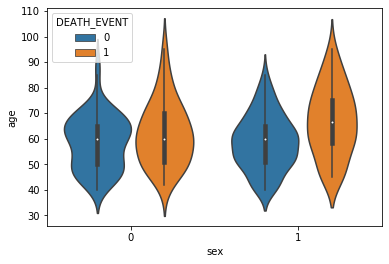

In [10]:
# Gender factor Analysis ~ survived vs gender
sns.violinplot(x = 'sex', y = 'age', hue = 'DEATH_EVENT', data = df)

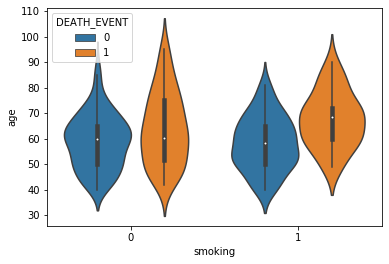

In [11]:
# Gender factor Analysis ~ survived vs smoking
sns.violinplot(x = 'smoking', y = 'age', hue = 'DEATH_EVENT', data = df)

In [12]:
print('The Survival is high for not smoking person 55 to 65, while for smoking person it is between 50 to 60')
print('Death event for smoking person is high than not smoking person')

The Survival is high for not smoking person 55 to 65, while for smoking person it is between 50 to 60
Death event for smoking person is high than not smoking person


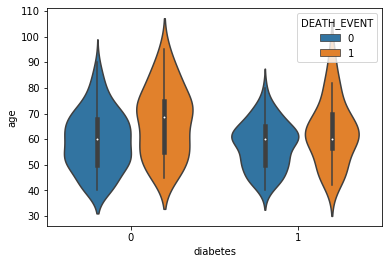

In [13]:
# Analysis in Age and Diabetes on Survival Status
sns.violinplot(x = 'diabetes', y = 'age', hue = 'DEATH_EVENT', data = df)

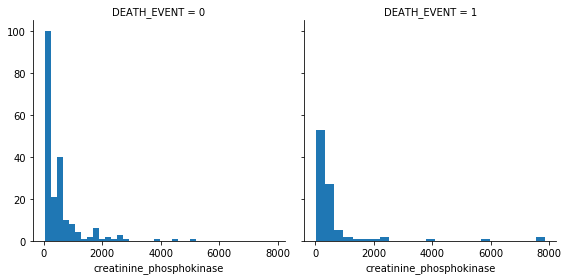

In [14]:
### other variables on survival status
### creatinine_phosphokinase
g = sns.FacetGrid(df, col="DEATH_EVENT", height=4, aspect=1)
g = g.map(plt.hist, "creatinine_phosphokinase", bins = 25)

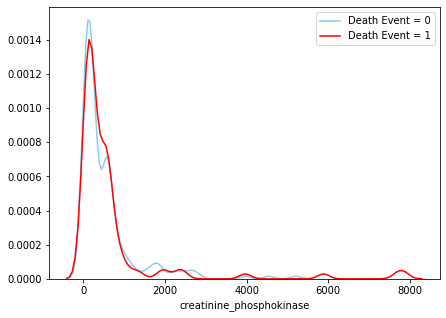

In [15]:
## or on the same axis
plt.figure(figsize=(7, 5))
sns.distplot( df[df['DEATH_EVENT'] == 0]["creatinine_phosphokinase"] , color="skyblue", label="Death Event = 0",hist=False)
sns.distplot( df[df['DEATH_EVENT'] == 1]["creatinine_phosphokinase"] , color="red", label="Death Event = 1",hist=False)
plt.legend()
plt.show()

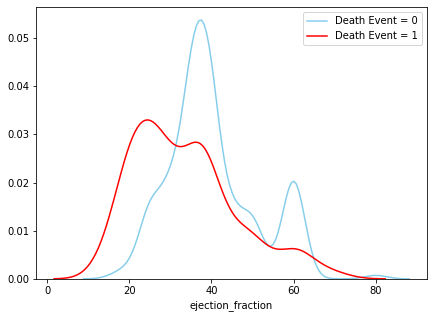

In [16]:
### ejection_fraction on survival status

plt.figure(figsize=(7, 5))
sns.distplot( df[df['DEATH_EVENT'] == 0]["ejection_fraction"] , color="skyblue", label="Death Event = 0",hist=False)
sns.distplot( df[df['DEATH_EVENT'] == 1]["ejection_fraction"] , color="red", label="Death Event = 1",hist=False)
plt.legend()
plt.show()

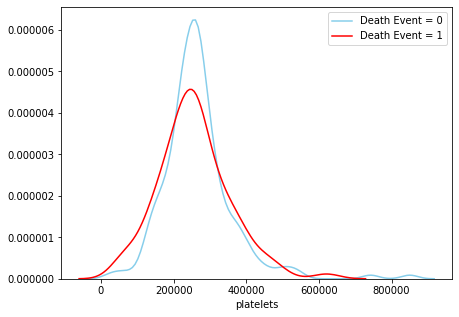

In [17]:
### platelets on survival status

plt.figure(figsize=(7, 5))
sns.distplot( df[df['DEATH_EVENT'] == 0]["platelets"] , color="skyblue", label="Death Event = 0",hist=False)
sns.distplot( df[df['DEATH_EVENT'] == 1]["platelets"] , color="red", label="Death Event = 1",hist=False)
plt.legend()
plt.show()

In [18]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


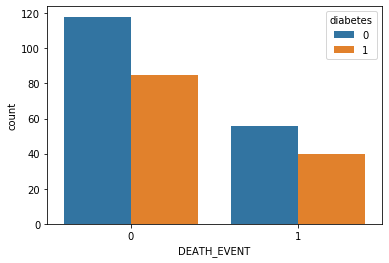

In [19]:
#diabetes
sns.countplot(x ='DEATH_EVENT', hue = 'diabetes', data = df)
plt.show()

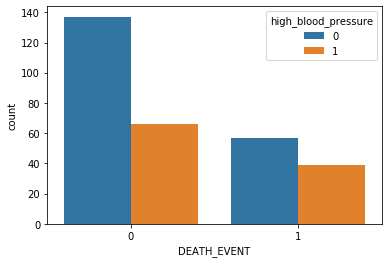

In [20]:
#high_blood_pressure
sns.countplot(x ='DEATH_EVENT', hue = 'high_blood_pressure', data = df)
plt.show()

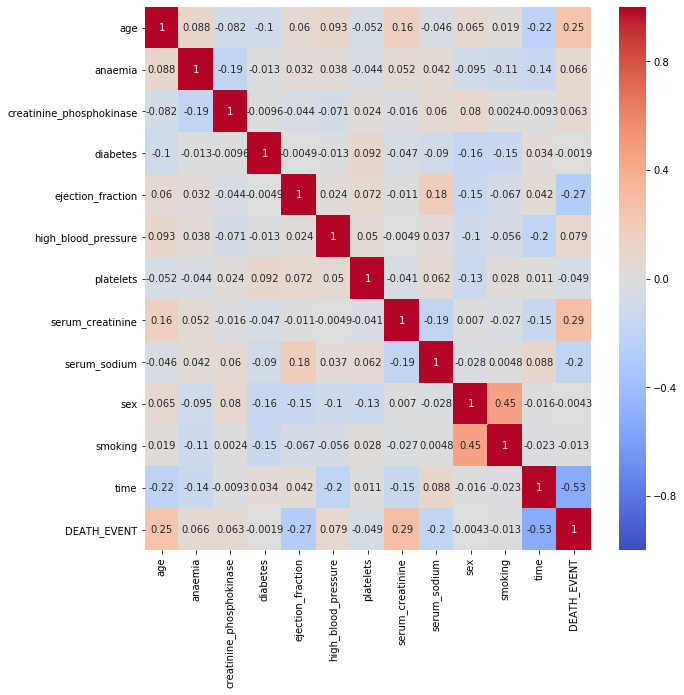

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True)

In [22]:
### modeling
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [23]:
y = df['DEATH_EVENT']
X = df.drop('DEATH_EVENT', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [24]:
knn = KNeighborsClassifier()

param = dict(n_neighbors = [2, 5, 10, 20, 50])
knn_grid = GridSearchCV(estimator=knn, param_grid = param, cv = 5, scoring = 'accuracy')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 20, 50]},
             scoring='accuracy')

In [25]:
knn_grid.best_params_

{'n_neighbors': 50}

In [26]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        64
           1       0.00      0.00      0.00        26

    accuracy                           0.71        90
   macro avg       0.36      0.50      0.42        90
weighted avg       0.51      0.71      0.59        90



/Users/shijiecai/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
rf = RandomForestClassifier()
n_estimators = [100, 200, 300]
max_depth = [3, 4, 5, 6]
min_samples_split = [3, 4, 5]
max_features = ['auto', 'sqrt']
params = dict(n_estimators = n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split)

rf_grid = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, cv=5, scoring = 'accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [28]:
rf_grid.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 5,
 'n_estimators': 300}

In [29]:
params = {'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 200}

rf = RandomForestClassifier(**params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        64
           1       0.95      0.69      0.80        26

    accuracy                           0.90        90
   macro avg       0.92      0.84      0.87        90
weighted avg       0.90      0.90      0.89        90



Text(0.5, 0, 'index of the feature')

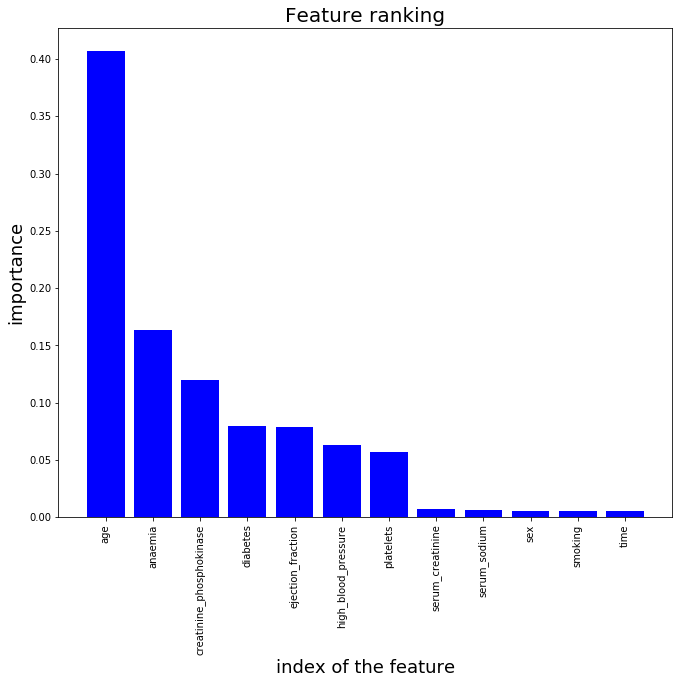

In [30]:
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns

f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importance[indices],
    color="b", 
    align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)

In [31]:
### since we have tried feature importance for rf, let's try another one: permutation importance.
import eli5
from eli5.sklearn import PermutationImportance
my_model = rf.fit(X_train, y_train)
perm = PermutationImportance(my_model, random_state=10).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

/Users/shijiecai/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/shijiecai/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


Weight,Feature
0.2378 ± 0.0412,time
0.0333 ± 0.0281,ejection_fraction
0.0311 ± 0.0166,serum_creatinine
0.0222 ± 0.0372,serum_sodium
0.0133 ± 0.0089,age
0.0067 ± 0.0109,platelets
0 ± 0.0000,smoking
0 ± 0.0000,sex
0 ± 0.0000,high_blood_pressure
0 ± 0.0000,diabetes


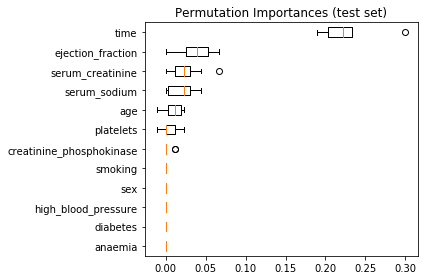

In [32]:
from sklearn.inspection import permutation_importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

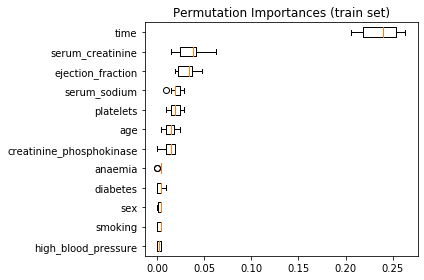

In [33]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

In [34]:
### maybe this is the reason why we have low accuracy, only a fall fraction of variables are important

In [35]:
Features = ['time','ejection_fraction','serum_creatinine','age', 'serum_sodium','creatinine_phosphokinase']
y = df['DEATH_EVENT']
X = df[Features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [36]:
knn = KNeighborsClassifier()

param = dict(n_neighbors = list(range(1, 10)))
knn_grid = GridSearchCV(estimator=knn, param_grid = param, cv = 5, scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 9}

In [37]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89        64
           1       0.92      0.46      0.62        26

    accuracy                           0.83        90
   macro avg       0.87      0.72      0.75        90
weighted avg       0.85      0.83      0.81        90



In [38]:
rf = RandomForestClassifier()
n_estimators = [100, 200, 300]
max_depth = [3, 4, 5, 6]
min_samples_split = [3, 4, 5]
max_features = ['auto', 'sqrt']
params = dict(n_estimators = n_estimators, max_depth=max_depth, max_features=max_features, min_samples_split=min_samples_split)

rf_grid = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, cv=5, scoring = 'accuracy')
rf_grid.fit(X_train, y_train)
rf_grid.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 100}

In [39]:
params = {'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 100}

rf = RandomForestClassifier(**params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        64
           1       0.86      0.73      0.79        26

    accuracy                           0.89        90
   macro avg       0.88      0.84      0.86        90
weighted avg       0.89      0.89      0.89        90



In [40]:
### knn is improved, however, rf is worse.

In [41]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
dt = DecisionTreeClassifier()
max_leaf = list(range(5, 11))
criterion = ['gini', 'entropy']
params = dict(max_leaf_nodes=max_leaf, criterion=criterion)

dt_grid = GridSearchCV(estimator=dt, param_grid=params, n_jobs=-1, cv=5, scoring = 'accuracy')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [43]:
dt_grid.best_params_

{'criterion': 'entropy', 'max_leaf_nodes': 5}

In [44]:
dt = DecisionTreeClassifier(max_leaf_nodes=5, random_state=30, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        64
           1       0.80      0.62      0.70        26

    accuracy                           0.84        90
   macro avg       0.83      0.78      0.80        90
weighted avg       0.84      0.84      0.84        90



In [45]:
#### lets try gradient boosting
# first try: no pruning

In [46]:
from sklearn import metrics

In [47]:
gbm = GradientBoostingClassifier(random_state=4)
gbm.fit(X_train,y_train)
y_pred = gbm.predict(X_test)
y_predprob = gbm.predict_proba(X_test)[:,1]
print("Accuracy : %.4g (test)" % metrics.accuracy_score(y_test, y_pred))
print("AUC Score : %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.8444 (test)
AUC Score : 0.916466


In [48]:
### lets prune the tree

In [49]:
gbm = GradientBoostingClassifier()
learning_rate = [0.01, 0.05, 0.1, 0.5, 1]
n_estimators = [100, 200, 300]
criterion = ['friedman_mse', 'mse', 'mae']
max_depth = range(3,14,2)

params = dict(learning_rate = learning_rate, n_estimators = n_estimators, criterion = criterion, max_depth = max_depth)
gbm_grid = GridSearchCV(estimator=gbm, param_grid=params, n_jobs=-1, cv=5, scoring = 'accuracy')
gbm_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': range(3, 14, 2),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [50]:
gbm_grid.best_params_

{'criterion': 'mae',
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 200}

In [51]:
params = {'criterion': 'mse',
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 100}

gbm = GradientBoostingClassifier(**params)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
y_predprob = gbm.predict_proba(X_test)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("AUC Score : %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.8222
AUC Score : 0.905349


In [72]:
xgb = XGBClassifier()
eta = list(np.arange(0.1,1,0.2))
max_depth = list(range(2,9,2))
subsample = list(np.arange(0.3, 1, 0.2))
n_estimators = list(range(100, 600, 100))
colsample_bytree = list(np.arange(0.3, 1, 0.2))

params = dict(eta = eta, n_estimators = n_estimators, subsample = subsample, max_depth = max_depth, colsample_bytree=colsample_bytree)
xgb_grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=-1, cv=5, scoring = 'accuracy')
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.

In [74]:
gbm_grid.best_params_

{'eta': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.3}

In [87]:
params = {'eta': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 0.3, 'colsample_bytree':0.7}

xgb = XGBClassifier(**params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_predprob = xgb.predict_proba(X_test)[:,1]
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred))
print("AUC Score : %f" % metrics.roc_auc_score(y_test, y_predprob))

Accuracy : 0.8778
AUC Score : 0.913462
